KNN MNIST Digit Recognition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)
df.head()

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Create Numpy Array.
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [5]:
X=data[:,1:] #Slicing.
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [6]:
split=int(0.8*X.shape[0]) #splitting 80% of the data.
print(split)

33600


In [7]:
X_train=X[:split,:] #Training and testing data.
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [8]:
def drawimg(sample): #Function which shows the actual image.
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

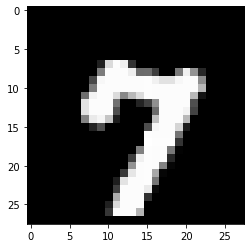

7


In [9]:
drawimg(X_test[1])
print(Y_test[1])

#Making predictions:

In [10]:
def dist(x1,x2): #Euclidean distance formula.
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5): #KNN Algorithm.
    vals=[]
    
    m=X.shape[0]
    
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
        
    vals=np.array(vals) #into numpy array
    #print(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [11]:
pred=knn(X_train,Y_train,X_test[18]) #Our model's prediction.
print(pred)

(array([5.]), array([5], dtype=int64))
5.0


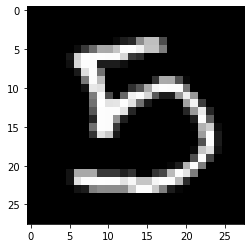

5


In [12]:
drawimg(X_test[18]) #Actual image with its label.
print(Y_test[18])

In [13]:
pred=knn(X_train,Y_train,X_test[5])
print(pred)

(array([6.]), array([5], dtype=int64))
6.0


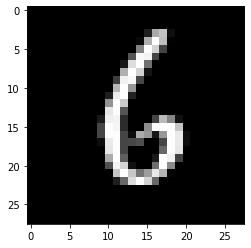

6


In [14]:
drawimg(X_test[5])
print(Y_test[5])